In [3]:
# ライブラリの取得
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")　多分いらなそう
# import oandapy
import configparser
import datetime
from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

# CSVデータの読み込み
import os
working_directory=os.getcwd()
#print(working_directory)
path_df=working_directory+'/Matplotlib練習用.csv'

In [4]:
#データフレームの生成。日付をインデックスとする。
df=pd.read_csv(path_df,parse_dates=['date'], index_col='date')

In [5]:
df

,value01,value02
date,,
2021-01-01,1,100
2021-01-02,3,500
2021-01-03,2,200
2021-01-04,4,600
2021-01-05,3,300
2021-01-06,5,700
2021-01-07,4,400
2021-01-08,6,800
2021-01-09,5,500


## plt.subplot()

<AxesSubplot:>

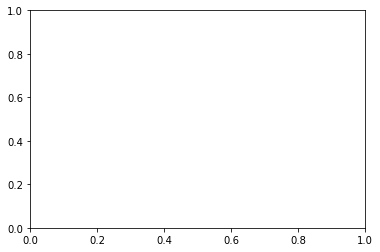

In [7]:
fig = plt.figure()
fig.add_subplot(111)

<AxesSubplot:>

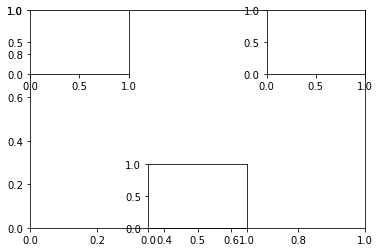

In [8]:
fig = plt.figure()
fig.add_subplot(1, 1, 1)
fig.add_subplot(3, 3, 1)   # 3x3の1つめ(左上)
fig.add_subplot(3, 3, 3)   # 3x3の3つめ(右上)
fig.add_subplot(3, 3, 8)   # 3x3の8つめ(真ん中下)

<AxesSubplot:>

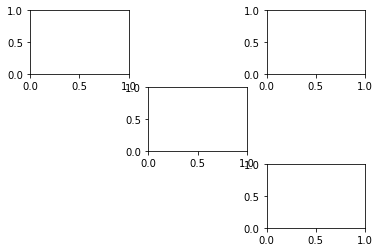

In [9]:
plt.subplot(3,3,1)
plt.subplot(3,3,3)
plt.subplot(3,3,5)
plt.subplot(3,3,9)

<AxesSubplot:>

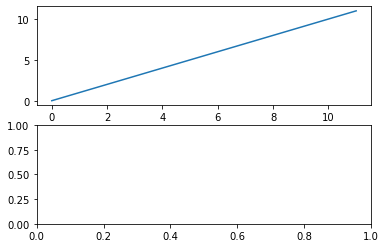

In [10]:
plt.plot([1,2,3])
plt.subplot(211)   # このタイミングで plt.plot([1,2,3]) は消されてしまう。
plt.plot(range(12))
plt.subplot(212)

## plt.subplots()

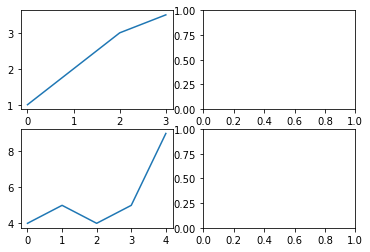

In [20]:
fig, ax= plt.subplots(2,2)   # axesはAxesオブジェクトの2x2の配列
ax[0][0].plot([1,2,3,3.5])
ax[1][0].plot([4,5,4,5,9])

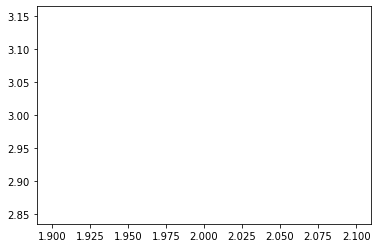

In [23]:
fig, ax = plt.subplots()
ax.plot(2, 3)
plt.show()

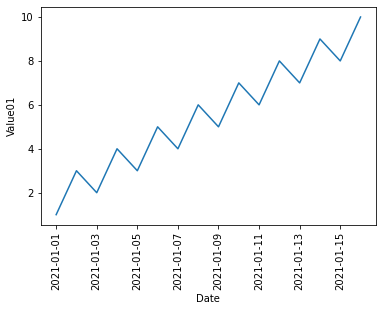

In [15]:
fig, ax = plt.subplots() #グラフの表示場所を指定したい場合は引数LMNを指定
plt.xticks(rotation=90)  #ラベルの表記を縦にしたい場合
ax.plot(df.index, df['value01'])
ax.set_xlabel('Date')
ax.set_ylabel('Value01')
plt.show()

## 複数軸のプロット

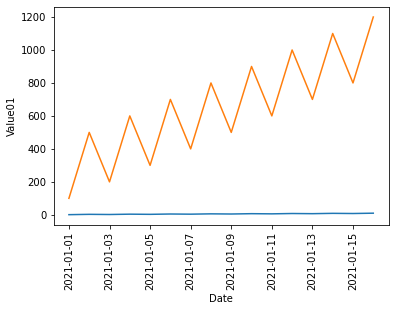

In [25]:
fig, ax = plt.subplots() #グラフの表示場所を指定したい場合は引数LMNを指定
plt.xticks(rotation=90)  #ラベルの表記を縦にしたい場合
ax.set_xlabel('Date')
ax.set_ylabel('Value01')

#複数変数の時系列プロット
ax.plot(df.index, df['value01'])
ax.plot(df.index, df['value02'])
plt.show()

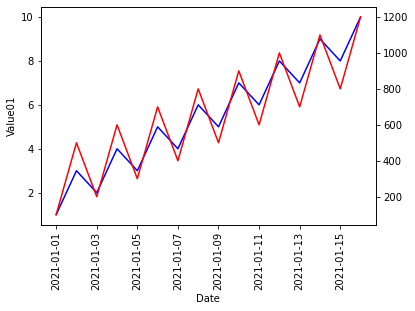

In [29]:
fig, ax = plt.subplots() #グラフの表示場所を指定したい場合は引数LMNを指定
plt.xticks(rotation=90)  #ラベルの表記を縦にしたい場合
ax.set_xlabel('Date')
ax.set_ylabel('Value01')

#複数変数の時系列プロット
ax.plot(df.index, df['value01'],color='b')

#X軸を共有する双軸
ax2=ax.twinx()

ax2.plot(df.index, df['value02'],color='r')
plt.show()

In [30]:
## 関数の活用

In [31]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

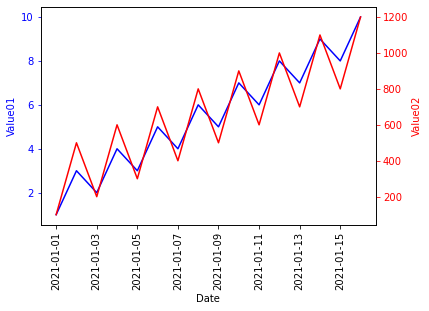

In [32]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
plot_timeseries(ax, df.index, df['value01'], 'blue', 'Date', 'Value01')
ax2 = ax.twinx()
plot_timeseries(ax2, df.index, df['value02'], 'red', 'Date', 'Value02')
plt.show()

##　時系列データの注釈

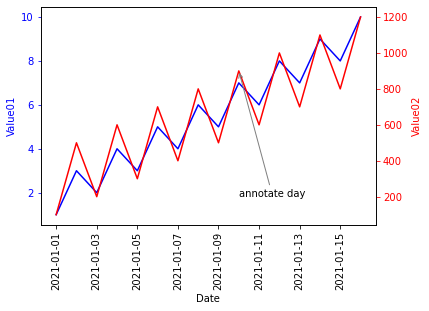

In [33]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
plot_timeseries(ax, df.index, df['value01'], 'blue', 'Date', 'Value01')
ax2 = ax.twinx()
plot_timeseries(ax2, df.index, df['value02'], 'red', 'Date', 'Value02')

ax2.annotate('annotate day', xy=(pd.Timestamp('2021-01-10'), 900),
             xytext=(pd.Timestamp('2021-01-10'), 200),
             arrowprops={'arrowstyle': '->', 'color': 'gray'})

plt.show()